In [1124]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [1125]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

In [1126]:
train_data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,1,1,2017,February,5,4,0,1,2,...,No Deposit,240.0,NaN,0,Transient,48.0,0,0,Canceled,04-02-2017
1,Resort Hotel,1,1,2017,February,5,4,0,1,1,...,No Deposit,240.0,NaN,0,Transient,43.0,0,0,Canceled,04-02-2017
2,Resort Hotel,1,0,2017,February,5,4,0,1,2,...,No Deposit,NaN,NaN,0,Transient,48.0,0,2,Canceled,04-02-2017
3,Resort Hotel,1,1,2017,February,5,4,0,1,1,...,No Deposit,240.0,NaN,0,Transient,43.0,0,0,Canceled,04-02-2017
4,Resort Hotel,1,29,2017,February,5,4,1,1,2,...,No Deposit,242.0,NaN,0,Transient,74.1,0,2,Canceled,19-01-2017


In [1127]:
test_data.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,01-07-2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,01-07-2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,02-07-2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,02-07-2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,03-07-2015


In [1128]:
# Removing iscancled col from the data so we can use this data for testing purpose
test_data_new = test_data.copy()

In [1129]:
test_data_new.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,01-07-2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,01-07-2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,02-07-2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,02-07-2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,03-07-2015


In [1130]:
train_data.shape , test_data.shape

((109391, 32), (9999, 32))

In [1131]:
train_data.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,109391.000000,109391.000000,109391.000000,109391.000000,109391.000000,109391.000000,109391.000000,109391.000000,109387.000000,109391.000000,109391.000000,109391.000000,109391.000000,109391.000000,94580.000000,6242.000000,109391.000000,109391.000000,109391.000000,109391.000000
mean,0.346381,103.026867,2016.202987,26.794206,15.791994,0.895631,2.420839,1.848671,0.101484,0.007331,0.034829,0.095081,0.149628,0.219616,75.255435,185.255046,2.401898,102.609922,0.063104,0.576656
std,0.475819,107.659026,0.703989,13.598527,8.763965,0.976867,1.833424,0.496472,0.392370,0.094753,0.183348,0.881652,1.563779,0.650258,105.858376,134.424197,18.000554,50.041012,0.246474,0.793710
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,17.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,51.000000,0.000000,71.100000,0.000000,0.000000
50%,0.000000,67.000000,2016.000000,27.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,169.000000,0.000000,95.000000,0.000000,0.000000
75%,1.000000,159.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,138.000000,268.750000,0.000000,126.000000,0.000000,1.000000
max,1.000000,629.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,4.000000,3.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [1132]:
test_data_new.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.000000,9999.0,9999.0,9999.0,9999.000000,8470.000000,555.000000,9999.000000,9999.000000,9999.000000,9999.000000
mean,0.633363,114.782578,2015.648565,31.223622,15.866587,1.277328,3.369637,1.940994,0.130213,0.014701,0.0,0.0,0.0,0.237624,214.414876,234.385586,1.437744,93.310892,0.056106,0.513451
std,0.481910,97.088010,0.522265,13.004139,8.963419,1.154930,2.425234,1.141131,0.460096,0.122829,0.0,0.0,0.0,0.674115,79.939480,82.722815,12.275986,54.948639,0.231869,0.780459
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,1.000000,9.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,37.000000,2015.000000,21.000000,8.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,240.000000,223.000000,0.000000,55.000000,0.000000,0.000000
50%,1.000000,90.000000,2016.000000,33.000000,16.000000,1.000000,3.000000,2.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,240.000000,223.000000,0.000000,77.850000,0.000000,0.000000
75%,1.000000,169.000000,2016.000000,41.000000,24.000000,2.000000,5.000000,2.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,241.000000,281.000000,0.000000,120.285000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,40.000000,55.000000,10.000000,2.000000,0.0,0.0,0.0,17.000000,481.000000,504.000000,150.000000,384.000000,2.000000,5.000000


In [1133]:
#Checking missing values
train_data.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              480
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              14811
company         

In [1134]:
test_data_new.isnull().sum()

hotel                                0
is_canceled                          0
lead_time                            0
arrival_date_year                    0
arrival_date_month                   0
arrival_date_week_number             0
arrival_date_day_of_month            0
stays_in_weekend_nights              0
stays_in_week_nights                 0
adults                               0
children                             0
babies                               0
meal                                 0
country                              8
market_segment                       0
distribution_channel                 0
is_repeated_guest                    0
previous_cancellations               0
previous_bookings_not_canceled       0
reserved_room_type                   0
assigned_room_type                   0
booking_changes                      0
deposit_type                         0
agent                             1529
company                           9444
days_in_waiting_list     

In [1135]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109391 entries, 0 to 109390
Data columns (total 32 columns):
hotel                             109391 non-null object
is_canceled                       109391 non-null int64
lead_time                         109391 non-null int64
arrival_date_year                 109391 non-null int64
arrival_date_month                109391 non-null object
arrival_date_week_number          109391 non-null int64
arrival_date_day_of_month         109391 non-null int64
stays_in_weekend_nights           109391 non-null int64
stays_in_week_nights              109391 non-null int64
adults                            109391 non-null int64
children                          109387 non-null float64
babies                            109391 non-null int64
meal                              109391 non-null object
country                           108911 non-null object
market_segment                    109391 non-null object
distribution_channel              109391 n

## Data Preprocessing

In [1136]:
#country
train_data['country'] =  train_data['country'].fillna('PRT')
test_data_new['country'] = test_data['country'].fillna('PRT')

#children for train only
train_data['children'] = train_data['children'].fillna(0)

# agent
train_data['agent'] =  train_data['agent'].fillna('75')
test_data_new['agent'] = test_data['agent'].fillna('75')

# company
train_data['company'] =  train_data['company'].fillna('185')
test_data_new['company'] = test_data['company'].fillna('185')



In [1137]:
# changing the data type of children column
train_data['children'] = train_data['children'].astype('int64')
test_data['children'] = test_data['children'].astype('int64')


In [1138]:
# Combining stayinweeknights and stayinweekend night in col called Total_nights
train_data['Total_nights']  = train_data['stays_in_week_nights'] + train_data['stays_in_weekend_nights']
test_data_new['Total_nights']  = test_data_new['stays_in_week_nights'] + test_data_new['stays_in_weekend_nights']


In [1139]:
# Drop the two cols
train_data = train_data.drop(['stays_in_week_nights','stays_in_weekend_nights'],axis = 1)
test_data_new = test_data_new.drop(['stays_in_weekend_nights','stays_in_week_nights'],axis = 1)

In [1140]:
# combining children babies and adults in one col called No_of_persons
train_data['No_of_persons'] = train_data['children'] + train_data['babies'] + train_data['adults']   
test_data_new['No_of_persons'] = test_data_new['children'] + test_data_new['babies'] + test_data_new['adults']   

In [1141]:
# drop the original cols
train_data =  train_data.drop(['children','babies','adults'],axis = 1)
test_data_new = test_data_new.drop(['children','babies','adults'],axis = 1)

In [1142]:
train_data = train_data.drop(['hotel','reservation_status_date'],axis = 1 )
test_data_new = test_data_new.drop(['hotel','reservation_status_date'],axis = 1 )


In [1143]:
train_data.head()

,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,meal,country,market_segment,distribution_channel,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,Total_nights,No_of_persons
0,1,1,2017,February,5,4,BB,PRT,Online TA,TA/TO,...,240,185,0,Transient,48.0,0,0,Canceled,1,2
1,1,1,2017,February,5,4,BB,PRT,Online TA,TA/TO,...,240,185,0,Transient,43.0,0,0,Canceled,1,1
2,1,0,2017,February,5,4,BB,PRT,Direct,Direct,...,75,185,0,Transient,48.0,0,2,Canceled,1,2
3,1,1,2017,February,5,4,BB,PRT,Online TA,TA/TO,...,240,185,0,Transient,43.0,0,0,Canceled,1,1
4,1,29,2017,February,5,4,HB,PRT,Online TA,TA/TO,...,242,185,0,Transient,74.1,0,2,Canceled,2,2


In [1144]:
train_data.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,Total_nights,No_of_persons
count,109391.000000,109391.000000,109391.000000,109391.000000,109391.000000,109391.000000,109391.000000,109391.000000,109391.000000,109391.000000,109391.000000,109391.000000,109391.000000,109391.00000,109391.000000
mean,0.346381,103.026867,2016.202987,26.794206,15.791994,0.034829,0.095081,0.149628,0.219616,2.401898,102.609922,0.063104,0.576656,3.31647,1.957483
std,0.475819,107.659026,0.703989,13.598527,8.763965,0.183348,0.881652,1.563779,0.650258,18.000554,50.041012,0.246474,0.793710,2.44333,0.651966
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000,0.00000,0.000000
25%,0.000000,17.000000,2016.000000,16.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,71.100000,0.000000,0.000000,2.00000,2.000000
50%,0.000000,67.000000,2016.000000,27.000000,16.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000,3.00000,2.000000
75%,1.000000,159.000000,2017.000000,38.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000,4.00000,2.000000
max,1.000000,629.000000,2017.000000,53.000000,31.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000,69.00000,12.000000


## Exploratory Data Analysis

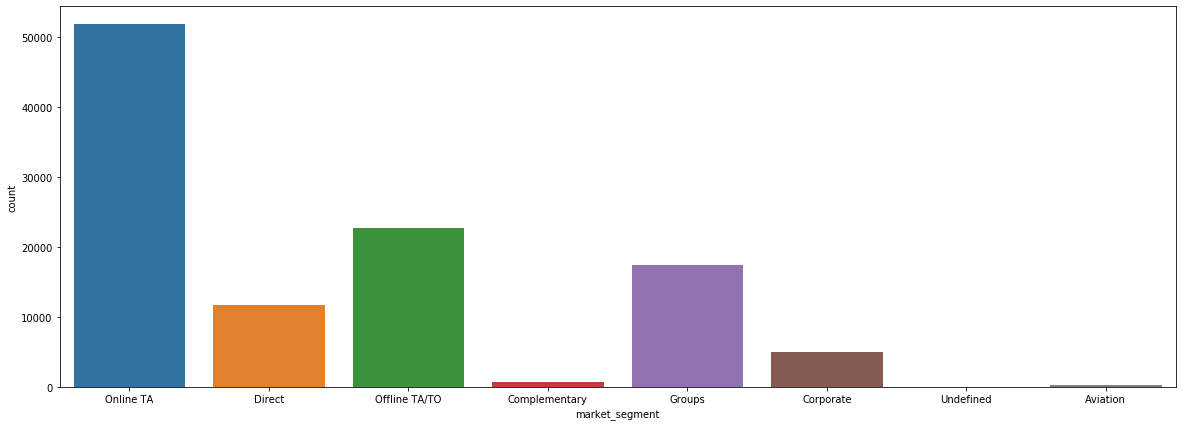

In [1145]:
plt.figure(figsize=(20,7))
sns.countplot('market_segment', data=train_data)

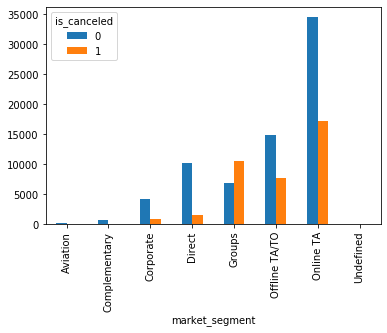

In [1146]:
ct  = pd.crosstab(index =train_data['market_segment'] , columns = train_data['is_canceled'])
ct.plot.bar()

##### So customers who are in groups are more likely to cancel the booking 

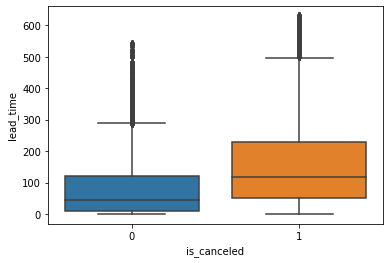

In [1147]:
sns.boxplot(x = train_data['is_canceled'] , y = train_data['lead_time'])

1)customers who have lead time of 17 to 67 days are not likely to cancel the booking

2)customers who have lead time more than 67 days are likely to cancel 

Outliers are present in lead time

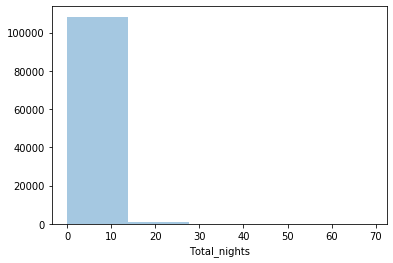

In [1148]:
sns.distplot(train_data['Total_nights'],kde = False , bins = 5)

Outliers are present on right side

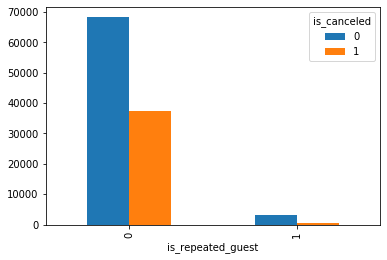

In [1149]:
ct  = pd.crosstab(index =train_data['is_repeated_guest'] , columns = train_data['is_canceled'])
ct.plot.bar()

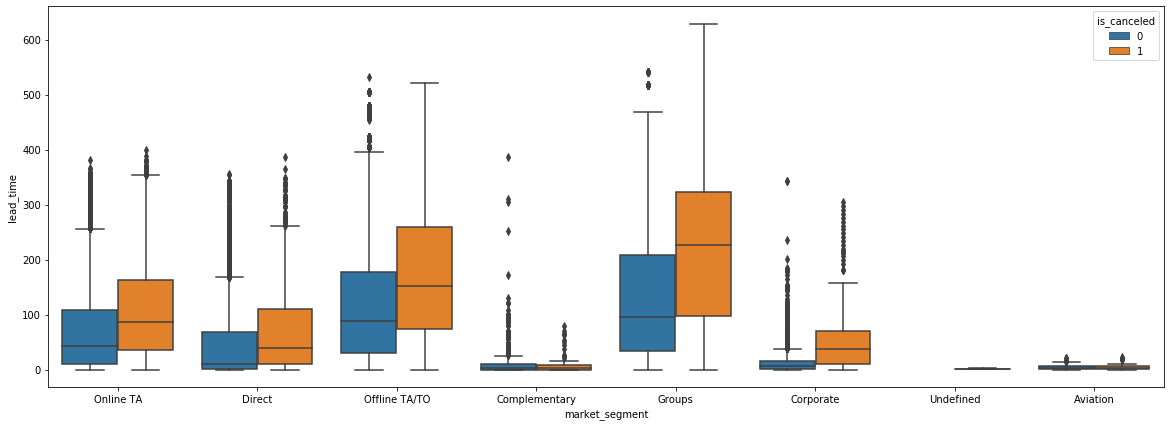

In [1150]:
plt.figure(figsize=(20,7))
sns.boxplot(x = train_data['market_segment'] , y = train_data['lead_time'] , hue = 'is_canceled' ,data = train_data)

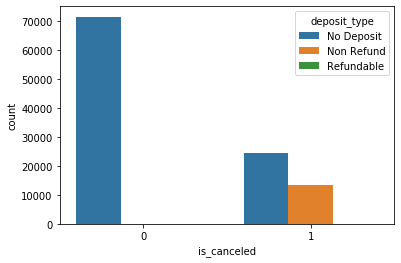

In [1151]:
sns.countplot(x = 'is_canceled' , data = train_data , hue = 'deposit_type')

if deposit type is non refundable then the customer will not cancel the booking

### Outlier Removal Using IQR from lead_time and Total_nights




In [1152]:
Q1 = train_data.lead_time.quantile(0.25)
Q3 = train_data.lead_time.quantile(0.75)
Q1, Q3

(17.0, 159.0)

In [1153]:
IQR = Q3 - Q1
IQR

142.0

In [1154]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit

(-196.0, 372.0)

In [1155]:
lead_time_outlier = train_data[(train_data.lead_time<lower_limit)|(train_data.lead_time>upper_limit)].index
#lead_time_test = test_data_new[(test_data_new.lead_time<lower_limit)|(test_data_new.lead_time>upper_limit)].index

In [1156]:
train_data.drop(lead_time_outlier,inplace = True)

In [1157]:
#test_data_new.drop(lead_time_test,inplace = True)

In [1158]:
# Total nights
q1 = train_data.Total_nights.quantile(0.25)
q2 = train_data.Total_nights.quantile(0.75)
q1,q2

(2.0, 4.0)

In [1159]:
IQR = q2-q1
IQR

2.0

In [1160]:
lower_limit = q1 - 1.5*IQR
upper_limit = q2 + 1.5*IQR
lower_limit, upper_limit

(-1.0, 7.0)

In [1161]:
Total_nights_outlier = train_data[(train_data.Total_nights<lower_limit)| (train_data.Total_nights>upper_limit)].index
#Test_total_outlier = test_data_new[(test_data_new.Total_nights<lower_limit)| (train_data.Total_nights>upper_limit)].index


In [1162]:
train_data.drop(Total_nights_outlier,inplace = True)
#test_data.drop(Test_total_outlier,inplace = True)

In [1163]:
train_data.shape

(102436, 27)

### Label Encoding

In [1164]:
from sklearn.preprocessing import LabelEncoder
labelEncoder = LabelEncoder()
category_col = ['market_segment','customer_type','arrival_date_month','meal','country','reserved_room_type','assigned_room_type','deposit_type','reservation_status','distribution_channel']
mapping_dict ={} 
for col in category_col: 
    train_data[col] = labelEncoder.fit_transform(train_data[col]) 
  
    le_name_mapping = dict(zip(labelEncoder.classes_, 
                        labelEncoder.transform(labelEncoder.classes_))) 
  
    mapping_dict[col]= le_name_mapping 
print(mapping_dict) 

{'market_segment': {'Aviation': 0, 'Complementary': 1, 'Corporate': 2, 'Direct': 3, 'Groups': 4, 'Offline TA/TO': 5, 'Online TA': 6, 'Undefined': 7}, 'customer_type': {'Contract': 0, 'Group': 1, 'Transient': 2, 'Transient-Party': 3}, 'arrival_date_month': {'April': 0, 'August': 1, 'December': 2, 'February': 3, 'January': 4, 'July': 5, 'June': 6, 'March': 7, 'May': 8, 'November': 9, 'October': 10, 'September': 11}, 'meal': {'BB': 0, 'FB': 1, 'HB': 2, 'SC': 3, 'Undefined': 4}, 'country': {'ABW': 0, 'AGO': 1, 'AIA': 2, 'ALB': 3, 'AND': 4, 'ARE': 5, 'ARG': 6, 'ARM': 7, 'ASM': 8, 'ATA': 9, 'ATF': 10, 'AUS': 11, 'AUT': 12, 'AZE': 13, 'BDI': 14, 'BEL': 15, 'BEN': 16, 'BFA': 17, 'BGD': 18, 'BGR': 19, 'BHR': 20, 'BHS': 21, 'BIH': 22, 'BLR': 23, 'BOL': 24, 'BRA': 25, 'BRB': 26, 'CAF': 27, 'CHE': 28, 'CHL': 29, 'CHN': 30, 'CIV': 31, 'CMR': 32, 'CN': 33, 'COL': 34, 'COM': 35, 'CPV': 36, 'CRI': 37, 'CUB': 38, 'CYP': 39, 'CZE': 40, 'DEU': 41, 'DJI': 42, 'DMA': 43, 'DNK': 44, 'DOM': 45, 'DZA': 46, 'E

In [1165]:
from sklearn.preprocessing import LabelEncoder
labelEncoder = LabelEncoder()
category_col = ['market_segment','customer_type','arrival_date_month','meal','country','reserved_room_type','assigned_room_type','deposit_type','reservation_status','distribution_channel']
mapping_dict ={} 
for col in category_col: 
    test_data_new[col] = labelEncoder.fit_transform(test_data_new[col]) 
  
    le_name_mapping = dict(zip(labelEncoder.classes_, 
                        labelEncoder.transform(labelEncoder.classes_))) 
  
    mapping_dict[col]= le_name_mapping 
print(mapping_dict) 

{'market_segment': {'Complementary': 0, 'Corporate': 1, 'Direct': 2, 'Groups': 3, 'Offline TA/TO': 4, 'Online TA': 5}, 'customer_type': {'Contract': 0, 'Group': 1, 'Transient': 2, 'Transient-Party': 3}, 'arrival_date_month': {'April': 0, 'August': 1, 'December': 2, 'February': 3, 'January': 4, 'July': 5, 'June': 6, 'March': 7, 'May': 8, 'November': 9, 'October': 10, 'September': 11}, 'meal': {'BB': 0, 'FB': 1, 'HB': 2, 'SC': 3, 'Undefined': 4}, 'country': {'AGO': 0, 'ALB': 1, 'AND': 2, 'ARE': 3, 'ARG': 4, 'AUS': 5, 'AUT': 6, 'BEL': 7, 'BLR': 8, 'BRA': 9, 'BWA': 10, 'CAF': 11, 'CHE': 12, 'CHL': 13, 'CHN': 14, 'CN': 15, 'COL': 16, 'CPV': 17, 'CRI': 18, 'CYM': 19, 'CYP': 20, 'CZE': 21, 'DEU': 22, 'DNK': 23, 'DZA': 24, 'ESP': 25, 'EST': 26, 'FIN': 27, 'FRA': 28, 'GBR': 29, 'GEO': 30, 'GGY': 31, 'GIB': 32, 'GRC': 33, 'HKG': 34, 'HRV': 35, 'HUN': 36, 'IND': 37, 'IRL': 38, 'IRN': 39, 'ISR': 40, 'ITA': 41, 'JAM': 42, 'JEY': 43, 'KOR': 44, 'KWT': 45, 'LTU': 46, 'LUX': 47, 'LVA': 48, 'MAR': 49, 

### Feature Importance using chi2

In [1166]:
X = train_data.drop(['is_canceled'],axis = 1)
Y = train_data['is_canceled']

In [1167]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
bestfeatures = SelectKBest(score_func=chi2, k=26)
fit = bestfeatures.fit(X,Y)

In [1168]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [1169]:
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns

In [1170]:
featureScores

,Specs,Score
0,lead_time,993592.473544
1,arrival_date_year,0.014919
2,arrival_date_month,3.776593
3,arrival_date_week_number,0.050158
4,arrival_date_day_of_month,21.429285
5,meal,0.302379
6,country,118462.387397
7,market_segment,121.699764
8,distribution_channel,1050.416699
9,is_repeated_guest,626.335120


In [1171]:
# Droping less scored column

train_data = train_data.drop(['arrival_date_year','arrival_date_week_number','meal'],axis = 1)

In [1172]:
test_data_new = test_data_new.drop(['arrival_date_year','arrival_date_week_number','meal'],axis = 1)

In [1173]:
train_data.shape , test_data_new.shape

((102436, 24), (9999, 24))

### Model Building

In [1174]:
#separting dependent and independent features.
target=train_data['is_canceled']
inputs=train_data.drop(['is_canceled'],axis=1)

In [1175]:
#Standardization
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(inputs)
X = scaler.transform(inputs)

In [1176]:
#Splitting train data into tarin & test for building and testing model.
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,target, test_size=0.10, random_state=67)

#### Random Forest

In [1177]:
# model 1
from sklearn.ensemble import RandomForestClassifier
rf_class = RandomForestClassifier()
rf_class.fit(x_train,y_train)
y_pred=rf_class.predict(x_test)


C:\Users\suyog\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [1178]:
y_pred_rand = rf_class.predict(x_test)

In [1179]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred_rand)

0.9990238188207732

In [1180]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred_rand)

array([[6781,    1],
       [   9, 3453]], dtype=int64)

#### Logistic Regression

In [1184]:
# model2
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression(C = 100, penalty ='l2', solver = 'newton-cg')
log_model.fit(x_train,y_train)

LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [1185]:
y_pred_lr = log_model.predict(x_test)

In [1186]:
accuracy_score(y_test,y_pred_lr)

0.9908238969152675

#### Gradient Boosting

In [1187]:
# model 3
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(x_train,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [1188]:
y_pred_gb = gb.predict(x_test)

In [1189]:
accuracy_score(y_test,y_pred_gb)

1.0

#### KNN

In [1190]:
# model 4
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier()

In [1191]:
neigh.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [1192]:
y_pred_knn = neigh.predict(x_test)
accuracy_score(y_test,y_pred_knn)

0.9978524014057009

### Checking on test data

In [1199]:
test = test_data_new.drop(['is_canceled'],axis = 1)
prediction = rf_class.predict(test)

In [1200]:
actual = test_data_new['is_canceled']

In [1201]:
accuracy_score(actual,prediction)

0.8425842584258426

In [1202]:
train_data.head()

,is_canceled,lead_time,arrival_date_month,arrival_date_day_of_month,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,...,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,Total_nights,No_of_persons
0,1,1,3,4,133,6,3,0,0,0,...,240,185,0,2,48.0,0,0,0,1,2
1,1,1,3,4,133,6,3,0,0,0,...,240,185,0,2,43.0,0,0,0,1,1
2,1,0,3,4,133,3,1,0,0,0,...,75,185,0,2,48.0,0,2,0,1,2
3,1,1,3,4,133,6,3,0,0,0,...,240,185,0,2,43.0,0,0,0,1,1
4,1,29,3,4,133,6,3,0,0,0,...,242,185,0,2,74.1,0,2,0,2,2


In [1204]:
rf_class.predict([[1,3,4,133,6,3,0,0,0,0,0,0,0,240,185,0,2,48,0,0,0,1,2]])

array([1], dtype=int64)

In [1205]:
import pickle
file = open("rf_class_model.pkl",'wb')
pickle.dump(rf_class,file)


In [1214]:
df = pd.DataFrame(prediction, columns=['is_canceled']).to_csv('submission.csv')